In [ ]:
import os
import sys
sys.path.append("../scripts")

from dust_QU_shell_integrator import (
    sum_QU_over_shells_jax,
    save_QU_to_fits,
    compute_QU_per_shell_jax,
    save_QU_shells_to_fits
)

# example usage

# Input files
angle_folder = "fits_shell_angles_jax_log"          
dust_file = "dust_density_shell_extraction.fits"    # Dust-map file input

# compute and save integrated map
Q_sum, U_sum = sum_QU_over_shells_jax(angle_folder, dust_file)
save_QU_to_fits(Q_sum, U_sum, "QU_integrated_dust.fits")


Saved Q and U integrated maps to QU_integrated_dust.fits


In [3]:
# Compute and save per-shell Q, U maps
Q_map_shells, U_map_shells = compute_QU_per_shell_jax(angle_folder, dust_file, assume_nested=True) # Set to False if your dust files are already in RING order
save_QU_shells_to_fits(Q_map_shells, U_map_shells,
                       "Q_shells_dust.fits",
                       "U_shells_dust.fits")

Loaded nd_data_all with shape: (516, 786432)
Computed Q/U maps: shape = (516, 786432)
✅ Saved: Q_shells_dust.fits and U_shells_dust.fits


# Healpy Mollview

Loaded Q/U maps with NSIDE = 256


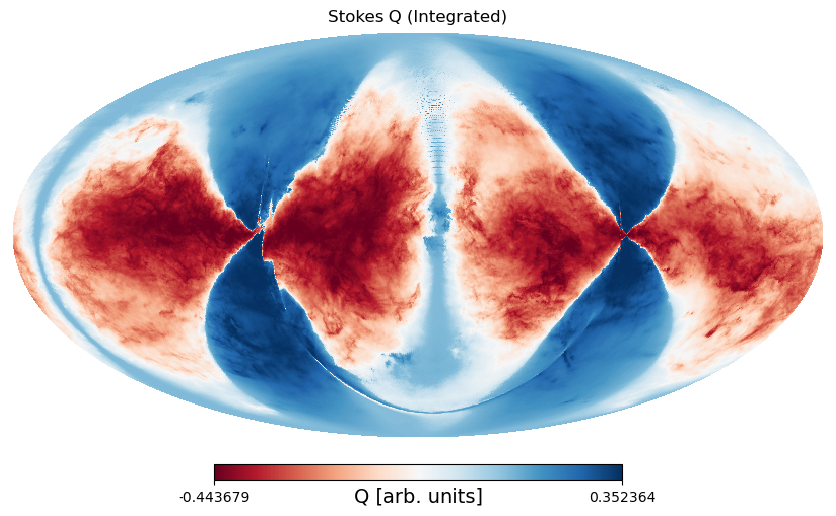

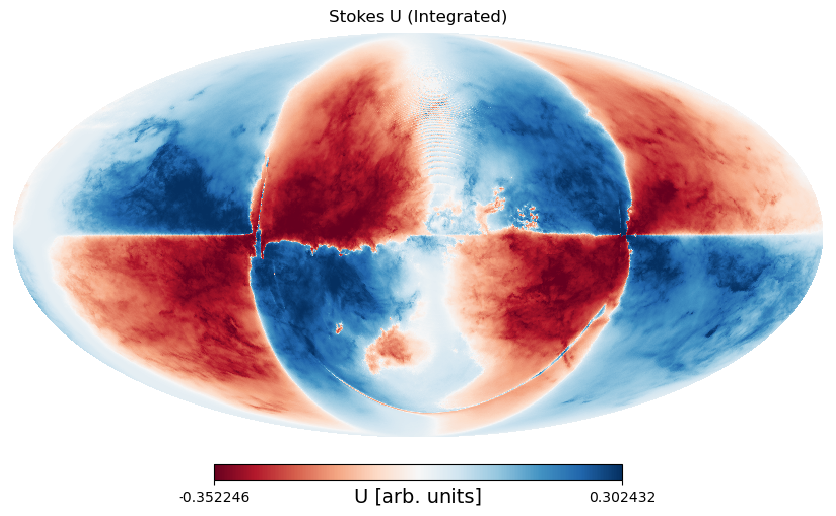

In [ ]:
from astropy.io import fits
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# === Load Q and U from BinTableHDU ===
filename = "QU_integrated_dust.fits"
with fits.open(filename) as hdul:
    table_data = hdul[1].data  # BinTableHDU with 2 columns
    Q_map = np.array(table_data.field(0))  # column 0: Q
    U_map = np.array(table_data.field(1))  # column 1: U

# === Confirm shape and NSIDE ===
assert Q_map.shape[0] == U_map.shape[0]
nside = hp.npix2nside(Q_map.shape[0])
print(f"Loaded Q/U maps with NSIDE = {nside}")

# === Optional: Replace NaNs ===
Q_map = np.nan_to_num(Q_map)
U_map = np.nan_to_num(U_map)

# === Plot Q and U ===
hp.mollview(Q_map, title="Stokes Q (Integrated)", unit="Q [arb. units]", cmap="RdBu", norm="hist")

hp.mollview(U_map, title="Stokes U (Integrated)", unit="U [arb. units]", cmap="RdBu", norm="hist")

plt.show()


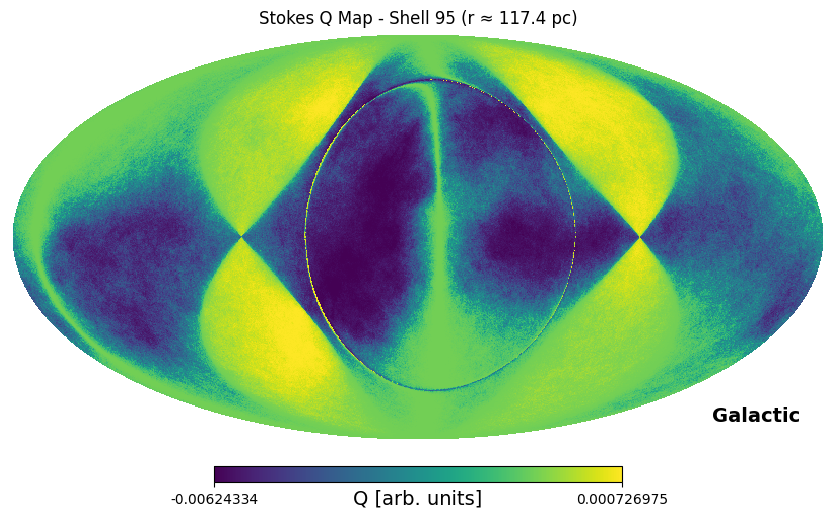

In [1]:
import healpy as hp
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# === Load the FITS file ===
file_path = "Q_shells_dust.fits"
with fits.open(file_path) as hdul:
    Q_data = hdul[0].data  

# === Choose a shell index to plot ===
R_MIN_PC = 68.811874
R_MAX_PC = 1244.5968
NUM_SHELLS = 516
r_vals = np.logspace(np.log10(R_MIN_PC), np.log10(R_MAX_PC), NUM_SHELLS)  # shape: (516,)
shell_index = 95  # any index from 0 to 515
r_shell = r_vals[95]
Q_map = Q_data[shell_index,:]  # ✅ this gets a full-sky HEALPix map of the selected shell

# === Plot ===
title = f"Stokes Q Map - Shell {shell_index} (r ≈ {r_shell:.1f} pc)"
hp.mollview(Q_map, title=title, unit="Q [arb. units]", coord='G', norm='hist', nest=False)

# === Save and show ===
plt.savefig("LB_maybe_Q.png", dpi=200, bbox_inches='tight')
plt.show()

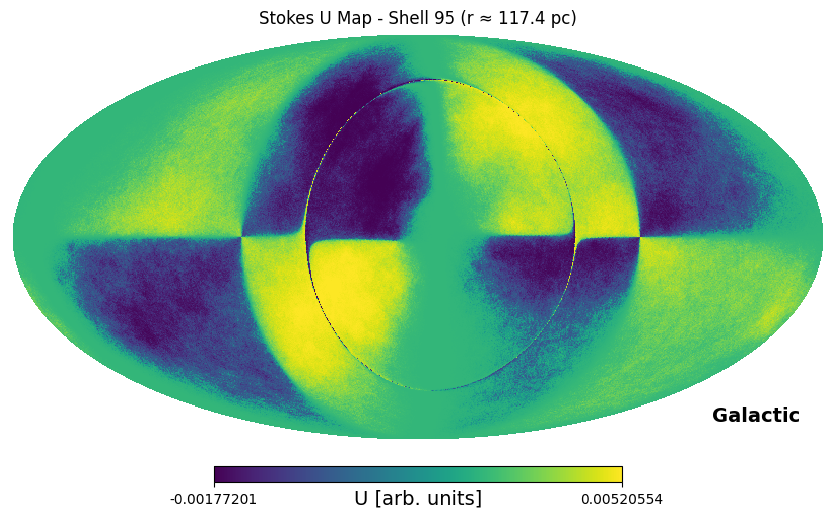

In [2]:
import healpy as hp
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# === Load the FITS file ===
file_path = "U_shells_dust.fits"
with fits.open(file_path) as hdul:
    U_data = hdul[0].data  

# === Choose a shell index to plot ===
R_MIN_PC = 68.811874
R_MAX_PC = 1244.5968
NUM_SHELLS = 516
r_vals = np.logspace(np.log10(R_MIN_PC), np.log10(R_MAX_PC), NUM_SHELLS)  # shape: (516,)
shell_index = 95  # any index from 0 to 515
r_shell = r_vals[95]
U_map = U_data[shell_index,:]  # ✅ this gets a full-sky HEALPix map of the selected shell

# === Plot ===
title = f"Stokes U Map - Shell {shell_index} (r ≈ {r_shell:.1f} pc)"
hp.mollview(U_map, title=title, unit="U [arb. units]", coord='G', norm='hist', nest=False)

# === Save and show ===
plt.savefig("LB_maybe_U.png", dpi=200, bbox_inches='tight')
plt.show()